Download a pretrained model based on huge corpus of images. Then customize it to perform specific task to our need.  

In [19]:
pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
import tensorflow as tf
import pandas as pd # used for dataframe manipulation  
import numpy as np # numerical analysis (like matrix operation)
import seaborn as sns # Data visulization and plotting 
import matplotlib.pyplot as plt 

In [21]:
tf.__version__

'2.0.0-alpha0'

Import the pretrained model (Pre trained Weights)

In [0]:
# load the model 
model = tf.keras.applications.ResNet50(weights = 'imagenet') # we have to specify what were the weights and which weights are we refering to and finally how did we trained the weights.
# here we load the network, and this network is already trained over the imagenet data set

Evaluate the pretrained model

In [23]:
# read the files from the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
sample_image1 = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/TF 2.0 Advanced/Transfer Learning Data/African_Elephant.jpg',target_size=(224,224))

In [0]:
sample_image2 = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/TF 2.0 Advanced/Transfer Learning Data/bicycle.png',target_size=(224,224))

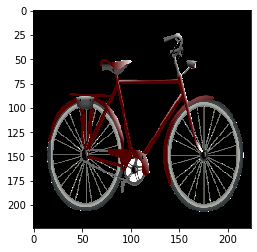

In [26]:
plt.imshow(sample_image2)

In [0]:
# transform the image into array 
sample_image2 = tf.keras.preprocessing.image.img_to_array(sample_image2)

In [28]:
sample_image2.shape

(224, 224, 3)

In [0]:
# we need to be sure that we will do the exact same preprocessing that the pretrained model did 
# to have the images as batch format, we need to extend the dimension of the image
# So  we want the image to be as a batch. 
sample_image2 = np.expand_dims(sample_image2,axis=0)

In [30]:
sample_image2.shape
# we will obtain 1 because we have only one image.

(1, 224, 224, 3)

In [31]:
sample_image2.max()

255.0

In [32]:
sample_image2.min()

0.0

In [0]:
# Now because we don't know what type of processing It will done before, we will apply it to our new image.
sample_image2 = tf.keras.applications.resnet50.preprocess_input(sample_image2)

In [34]:
sample_image2.max()

151.061

In [35]:
sample_image2.min()

-123.68

In [0]:
prediction = model.predict(sample_image2)

In [37]:
prediction

array([[8.47287447e-06, 1.00657808e-05, 1.66810742e-06, 1.11876250e-06,
        2.55786335e-06, 3.19998026e-06, 4.62592425e-07, 9.70597248e-05,
        2.80559143e-05, 5.48170647e-06, 1.36736471e-05, 2.60748329e-05,
        3.31227784e-06, 2.19848916e-05, 8.42911561e-07, 1.82426847e-05,
        3.54935878e-06, 7.36369975e-06, 1.61485059e-05, 4.74649278e-06,
        4.13463385e-06, 1.51682843e-06, 6.26641031e-06, 7.74786022e-05,
        5.47586023e-06, 1.66116990e-06, 7.97701523e-06, 7.10115228e-06,
        9.52778100e-06, 1.74206684e-06, 2.05740321e-06, 4.65168296e-06,
        2.36426104e-06, 1.09067764e-06, 4.79268601e-05, 1.72214561e-06,
        1.72735656e-06, 2.26742554e-06, 1.13267524e-05, 2.27938449e-06,
        8.47517822e-06, 1.40547513e-06, 2.89386776e-06, 1.68011013e-06,
        6.78995866e-06, 9.50220146e-06, 9.52813082e-07, 1.89754064e-06,
        1.33915955e-06, 4.91100366e-07, 7.94740845e-06, 7.59213935e-06,
        7.30433294e-06, 3.94107974e-06, 1.03420134e-05, 1.347595

In [38]:
# to understand this prediction we need to decode our prediction 
print('Prediction: ',tf.keras.applications.resnet50.decode_predictions(prediction)[0])

40960/35363 [==================================] - 0s 0us/step
Prediction:  [('n02835271', 'bicycle-built-for-two', 0.6637825), ('n03792782', 'mountain_bike', 0.05381947), ('n04482393', 'tricycle', 0.05224806), ('n03599486', 'jinrikisha', 0.017589984), ('n03930313', 'picket_fence', 0.00820201)]


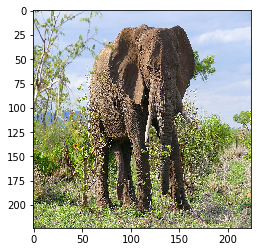

In [46]:
plt.imshow(sample_image1)

In [0]:
sample_image1 = tf.keras.preprocessing.image.img_to_array(sample_image1)

In [48]:
sample_image1.shape

(224, 224, 3)

In [49]:
sample_image1.max()

255.0

In [50]:
sample_image1.min()

0.0

In [0]:
sample_image1 = np.expand_dims(sample_image1,axis=0)

In [0]:
sample_image1 = tf.keras.applications.resnet50.preprocess_input(sample_image1)

In [53]:
sample_image1.min()

-123.68

In [54]:
sample_image1.max()

151.061

In [0]:
prediction1 = model.predict(sample_image1)

In [56]:
print ('prediction: ',tf.keras.applications.resnet50.decode_predictions(prediction1)[0])

prediction:  [('n01871265', 'tusker', 0.57963437), ('n02504458', 'African_elephant', 0.12706614), ('n02113799', 'standard_poodle', 0.12434754), ('n02504013', 'Indian_elephant', 0.09200564), ('n02102973', 'Irish_water_spaniel', 0.03075511)]


Apply the transfer learning

We will build our model using two pices. The first one using base model (derived from RESNET 50). and the second model that be customized to our problem. 

In [57]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False) # the second parameter is refers to discard the top of the model that used for calssification (Desnse part).


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step


In [58]:
print (base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [59]:
# Visualize our layers
# enumerate it returns the index and the item 
for i, layer in enumerate(base_model.layers):
  print (i,layer.name)

0 input_4
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_147
5 pool1_pad
6 max_pooling2d_3
7 res2a_branch2a
8 bn2a_branch2a
9 activation_148
10 res2a_branch2b
11 bn2a_branch2b
12 activation_149
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_48
18 activation_150
19 res2b_branch2a
20 bn2b_branch2a
21 activation_151
22 res2b_branch2b
23 bn2b_branch2b
24 activation_152
25 res2b_branch2c
26 bn2b_branch2c
27 add_49
28 activation_153
29 res2c_branch2a
30 bn2c_branch2a
31 activation_154
32 res2c_branch2b
33 bn2c_branch2b
34 activation_155
35 res2c_branch2c
36 bn2c_branch2c
37 add_50
38 activation_156
39 res3a_branch2a
40 bn3a_branch2a
41 activation_157
42 res3a_branch2b
43 bn3a_branch2b
44 activation_158
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_51
50 activation_159
51 res3b_branch2a
52 bn3b_branch2a
53 activation_160
54 res3b_branch2b
55 bn3b_branch2b
56 activation_161
57 res3b_branch2c
58 bn3b_branch2c
59 add_52
60 activation_162
61 r

In [0]:
# get the output of my model, then apply global average pooling to compress our feature map comming from output then build our dense layer
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x) # here I will feed x as input

In [0]:
# Now i'm ready to add my Dense layer
x = tf.keras.layers.Dense(1024,activation='relu')(x)
# then take the output of this and add an conditional Desnse layer (that's why we put x at the end of the last statement)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
preds = tf.keras.layers.Dense(2,activation='softmax')(x)# Here I will have 2 neurons in the output (cat&dogs)


In [67]:
preds

<tf.Tensor 'dense_4/Softmax:0' shape=(None, 2) dtype=float32>

In [0]:
# Now I'm ready to create my own network 
# Now using Model in keras I will build my new own model which consists of two parts (base model & preds)
model = tf.keras.models.Model(inputs = base_model.input,outputs = preds)

In [69]:
print (model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, None, None, 6 256         conv1[0][0]                      
______________________________________________________________________________________________

In [70]:
for i, layer in enumerate(model.layers):
  print (i,layer.name)

0 input_4
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_147
5 pool1_pad
6 max_pooling2d_3
7 res2a_branch2a
8 bn2a_branch2a
9 activation_148
10 res2a_branch2b
11 bn2a_branch2b
12 activation_149
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_48
18 activation_150
19 res2b_branch2a
20 bn2b_branch2a
21 activation_151
22 res2b_branch2b
23 bn2b_branch2b
24 activation_152
25 res2b_branch2c
26 bn2b_branch2c
27 add_49
28 activation_153
29 res2c_branch2a
30 bn2c_branch2a
31 activation_154
32 res2c_branch2b
33 bn2c_branch2b
34 activation_155
35 res2c_branch2c
36 bn2c_branch2c
37 add_50
38 activation_156
39 res3a_branch2a
40 bn3a_branch2a
41 activation_157
42 res3a_branch2b
43 bn3a_branch2b
44 activation_158
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_51
50 activation_159
51 res3b_branch2a
52 bn3b_branch2a
53 activation_160
54 res3b_branch2b
55 bn3b_branch2b
56 activation_161
57 res3b_branch2c
58 bn3b_branch2c
59 add_52
60 activation_162
61 r

In [0]:
# Now in the training phase I'm going to freeze the layers that derived from the base model (174 layers) and train only the layers that related to preds
# that done by using the trainable property in layers and set it to False 
for layer in model.layers[:175]:# all layers up till 175
  layer.trainable = False 


In [0]:
for layer in model.layers[175:]:
  layer.trainable = True

In [74]:
# firstly preprocess the images as in the trained model
# to generate newer image to me  we will use Image Data Generator 
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)# each time I'm gonna take my image, i'm going to apply this preprocessing function
# then apply this generator to my train image 
train_generator = train_gen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/TF 2.0 Advanced/Transfer Learning Data/train',
                                                target_size = (224,224),
                                                color_mode = 'rgb',
                                                batch_size = 32,
                                                class_mode = 'categorical', 
                                                shuffle = True)

Found 202 images belonging to 2 classes.


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=train_generator.n//train_generator.batch_size,epochs=5)

Epoch 1/5
6/6 [==============================] - 63s 11s/step - loss: 1.0916 - accuracy: 0.6471
Epoch 2/5
6/6 [==============================] - 10s 2s/step - loss: 0.2477 - accuracy: 0.8824
Epoch 3/5
6/6 [==============================] - 2s 269ms/step - loss: 0.1056 - accuracy: 0.9531
Epoch 4/5
6/6 [==============================] - 1s 237ms/step - loss: 0.0134 - accuracy: 0.9932
Epoch 5/5
6/6 [==============================] - 2s 271ms/step - loss: 0.0124 - accuracy: 0.9948


Evaluate and Test the new model

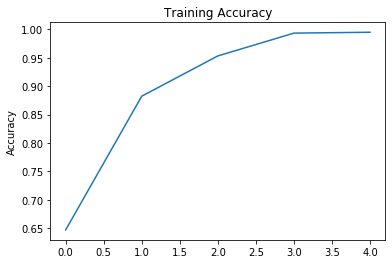

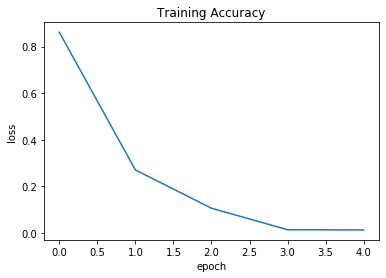

In [77]:
# history contains all information through all epochs 
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc,label = 'Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()
plt.plot(loss,label = 'Training loss')
plt.ylabel('loss')
plt.title('Training Accuracy')

plt.xlabel('epoch')
plt.show()

In [0]:
cate_tested_image = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/TF 2.0 Advanced/Transfer Learning Data/cat.282.jpg',target_size=(224,224))
dog_tested_imgae = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/Colab Notebooks/TF 2.0 Advanced/Transfer Learning Data/dog.309.jpg',target_size=(224,224))

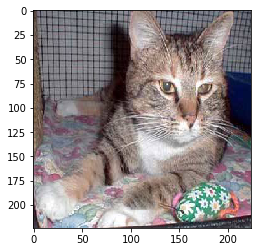

In [79]:
plt.imshow(cate_tested_image)

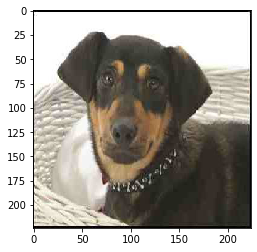

In [80]:
plt.imshow(dog_tested_imgae)

In [0]:
cate_tested_image = tf.keras.preprocessing.image.img_to_array(cate_tested_image)

In [83]:
cate_tested_image.shape

(224, 224, 3)

In [0]:
cate_tested_image = np.expand_dims(cate_tested_image,axis=0)

In [86]:
dog_tested_imgae = tf.keras.preprocessing.image.img_to_array(dog_tested_imgae)
np.shape(dog_tested_imgae)

(224, 224, 3)

In [0]:
dog_tested_imgae = np.expand_dims(dog_tested_imgae,axis=0)

In [88]:
dog_tested_imgae.shape

(1, 224, 224, 3)

In [89]:
cate_tested_image = tf.keras.applications.resnet50.preprocess_input(cate_tested_image)
predictions = model.predict(cate_tested_image)
print ('Predictions: ',predictions)

Predictions:  [[9.9999988e-01 1.0402145e-07]]


In [91]:
dog_tested_imgae = tf.keras.applications.resnet50.preprocess_input(dog_tested_imgae)
predictions =model.predict(dog_tested_imgae)
print ('predictions: ', predictions)

predictions:  [[5.104015e-08 1.000000e+00]]
